In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import seaborn as sns
import datetime
import yfinance as yf
import pickle

In [2]:
    SECTOR_ETF_SYMBOLS = {
        'XLB': 'Materials',
        'XLC': 'Communication Services',
        'XLE': 'Energy',
        'XLF': 'Financials',
        'XLI': 'Industrials',
        'XLK': 'Information Technology',
        'XLP': 'Consumer Staples',
        'XLRE': 'Real Estate',
        'XLU': 'Utilities',
        'XLV': 'Health Care',
        'XLY': 'Consumer Discretionary'
    }

    IMPT_COLUMNS = {'spy_close': 'S&P',
                    'xlb_close': 'Materials',
                    'xlc_close': 'Communication Services',
                    'xle_close': 'Energy',
                    'xlf_close': 'Financials',
                    'xli_close': 'Industrials',
                    'xlk_close': 'Information Technology',
                    'xlp_close': 'Consumer Staples',
                    'xlre_close': 'Real Estate',
                    'xlu_close':  'Utilities',
                    'xlv_close': 'Health Care',
                    'xly_close': 'Consumer Discretionary'}
    symbols = SECTOR_ETF_SYMBOLS.keys()

In [3]:
    def create_initial_spy_dataframe(start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      spy_data = yf.download("SPY", start=start_date, end=end_date)
      spy_data = spy_data[['Adj Close']]
      spy_data.rename(columns={'Adj Close': 'spy_close'}, inplace=True)
      return spy_data

In [4]:
spy_df = create_initial_spy_dataframe()

[*********************100%***********************]  1 of 1 completed


/Users/sachin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
spy_df

,spy_close
Date,
2007-01-03,107.832581
2007-01-04,108.061440
2007-01-05,107.199524
2007-01-08,107.695328
2007-01-09,107.603760
...,...
2020-04-03,248.190002
2020-04-06,264.859985
2020-04-07,265.130005


In [6]:
 def add_symbol_data_to_dataframe(init_df, start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      for sym in symbols:
          data = yf.download(sym, start=start_date, end=end_date)
          init_df[f'{sym.lower()}_close'] = data['Adj Close']
      return init_df

In [7]:
add_symbol_data_to_dataframe(spy_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,xlv_close,xly_close
Date,,,,,,,,,,,,
2007-01-03,107.832581,25.767790,NaN,40.278873,17.610264,26.685133,19.024708,18.462629,NaN,22.747271,26.436159,31.657227
2007-01-04,108.061440,25.648664,NaN,39.545620,17.553020,26.571518,19.318270,18.490711,NaN,22.716377,26.736027,31.649019
2007-01-05,107.199524,25.477436,NaN,39.809029,17.414692,26.480625,19.163330,18.357285,NaN,22.308636,26.586088,31.435328
2007-01-08,107.695328,25.477436,NaN,39.809029,17.491016,26.579100,19.220415,18.385380,NaN,22.296274,26.617653,31.484642
2007-01-09,107.603760,25.484867,NaN,39.467331,17.462395,26.563938,19.244881,18.427515,NaN,22.314800,26.586088,31.657227
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,248.190002,42.610001,42.150002,29.830000,19.639999,56.340000,77.120003,55.349998,29.299999,51.790001,86.779999,92.410004
2020-04-06,264.859985,45.779999,44.930000,31.410000,21.049999,60.240002,83.699997,57.410000,31.420000,55.790001,91.330002,100.099998
2020-04-07,265.130005,47.000000,45.259998,32.080002,21.260000,60.099998,82.949997,56.750000,31.430000,55.090000,90.580002,101.589996


In [8]:
    def calculate_betas(init_df, window=10, absvalue=True):
      pct_changes = init_df.pct_change()
      for sym in symbols:
        if absvalue == True:
          pct_changes[f'{sym.lower()}_beta'] = abs(pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var())
        else:
          pct_changes[f'{sym.lower()}_beta'] = pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var()
      return pct_changes

In [9]:
betas = calculate_betas(spy_df)

In [10]:
    def get_data_for_a_period(df, start_date, end_date):
      new_df = df.reset_index()
      new_df['Date'] = pd.to_datetime(new_df['Date'])
      mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
      return new_df.loc[mask]

In [13]:
get_data_for_a_period(spy_df, '2020-03-06', '2020-04-08').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3317 to 3339
Data columns (total 13 columns):
Date          23 non-null datetime64[ns]
spy_close     23 non-null float64
xlb_close     23 non-null float64
xlc_close     23 non-null float64
xle_close     23 non-null float64
xlf_close     23 non-null float64
xli_close     23 non-null float64
xlk_close     23 non-null float64
xlp_close     23 non-null float64
xlre_close    23 non-null float64
xlu_close     23 non-null float64
xlv_close     23 non-null float64
xly_close     23 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 2.5 KB


In [59]:
    def plot_sector_betas_over_time(betas_df, title):
      fig, axs = plt.subplots(6, 2, sharey=True, figsize=(15, 35))
      plt.tight_layout()
      plt.subplots_adjust(hspace=.6)
      plt.xticks(fontsize=12)
      new_df = betas_df.set_index('Date')
      for sym, ax in zip(SECTOR_ETF_SYMBOLS.keys(), axs.flatten()):
        new_df[f'{sym.lower()}_beta'].plot(
            ax=ax)
        ax.axhline(y=1, color='r')
        ax.set_ylabel('beta', fontsize=14)
        ax.set_xlabel('date', fontsize=14)
        ax.set_title(SECTOR_ETF_SYMBOLS[sym], fontsize=14)
      fig.delaxes(axs[-1, -1])
      plt.savefig(title, bbox_inches = "tight")


In [26]:
    def plot_average_betas(df, title):
      fig, ax = plt.subplots(figsize=(12, 8))
      ax.set_title(title, fontsize=18)
      ax.set_ylabel('beta', fontsize=14)
      ax.set_xlabel('sector', fontsize=14)
      df[['sector', 'recent_average_beta', 'historical_average_beta']].plot(kind='bar', x='sector', ax=ax)
      plt.tight_layout()
      plt.savefig(title)

In [14]:
    def t_test_for_symbol_betas(betas_df, historical_start):
      data = {'symbol': [], 'sector': [], 'p_value': [], 'significant?': [], 'recent_average_beta': [], 'historical_average_beta': [], 'difference': []}
      for sym in symbols:
        if sym == 'XLC' and historical_start < '2018-08-06':
          historical_start = '2018-08-06'
        col = f'{sym.lower()}_beta'
        historical = get_data_for_a_period(betas_df, historical_start, '2020-03-06')[col].values
        recent = get_data_for_a_period(betas_df, '2020-03-06', '2020-04-08')[col].values
        p_value = scs.ttest_ind(historical, recent, equal_var=False)[1]
        data['symbol'].append(sym)
        data['sector'].append(SECTOR_ETF_SYMBOLS[sym])
        data['p_value'].append(p_value)
        data['significant?'].append(p_value < .01)
        data['recent_average_beta'].append(recent.mean())
        data['historical_average_beta'].append(historical.mean())
        data['difference'].append(recent.mean() - historical.mean())
      return pd.DataFrame(data)

In [64]:
one_month = t_test_for_symbol_betas(betas, '2020-02-06')
one_month.to_clipboard()
one_month

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,2.518683e-01,False,1.049375,1.116781,-0.067406
1,XLC,Communication Services,3.064951e-01,False,0.893438,0.839719,0.053719
2,XLE,Energy,1.398823e-01,False,1.336598,1.239690,0.096908
3,XLF,Financials,7.126193e-10,True,1.249197,0.980564,0.268633
4,XLI,Industrials,1.665136e-01,False,1.110168,1.041571,0.068597
5,XLK,Information Technology,4.278018e-05,True,1.141133,1.402461,-0.261328
6,XLP,Consumer Staples,3.236326e-03,True,0.792140,0.567676,0.224465
7,XLRE,Real Estate,1.300072e-06,True,1.082285,0.578734,0.503551
8,XLU,Utilities,4.955123e-07,True,1.065522,0.471081,0.594442
9,XLV,Health Care,4.795291e-03,True,0.880450,1.020170,-0.139720


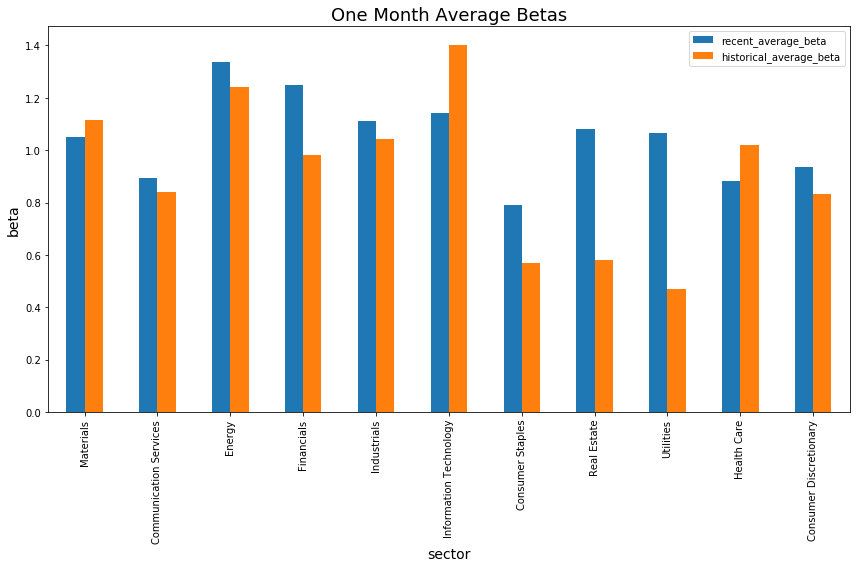

In [52]:
plot_average_betas(one_month, 'One Month Average Betas')

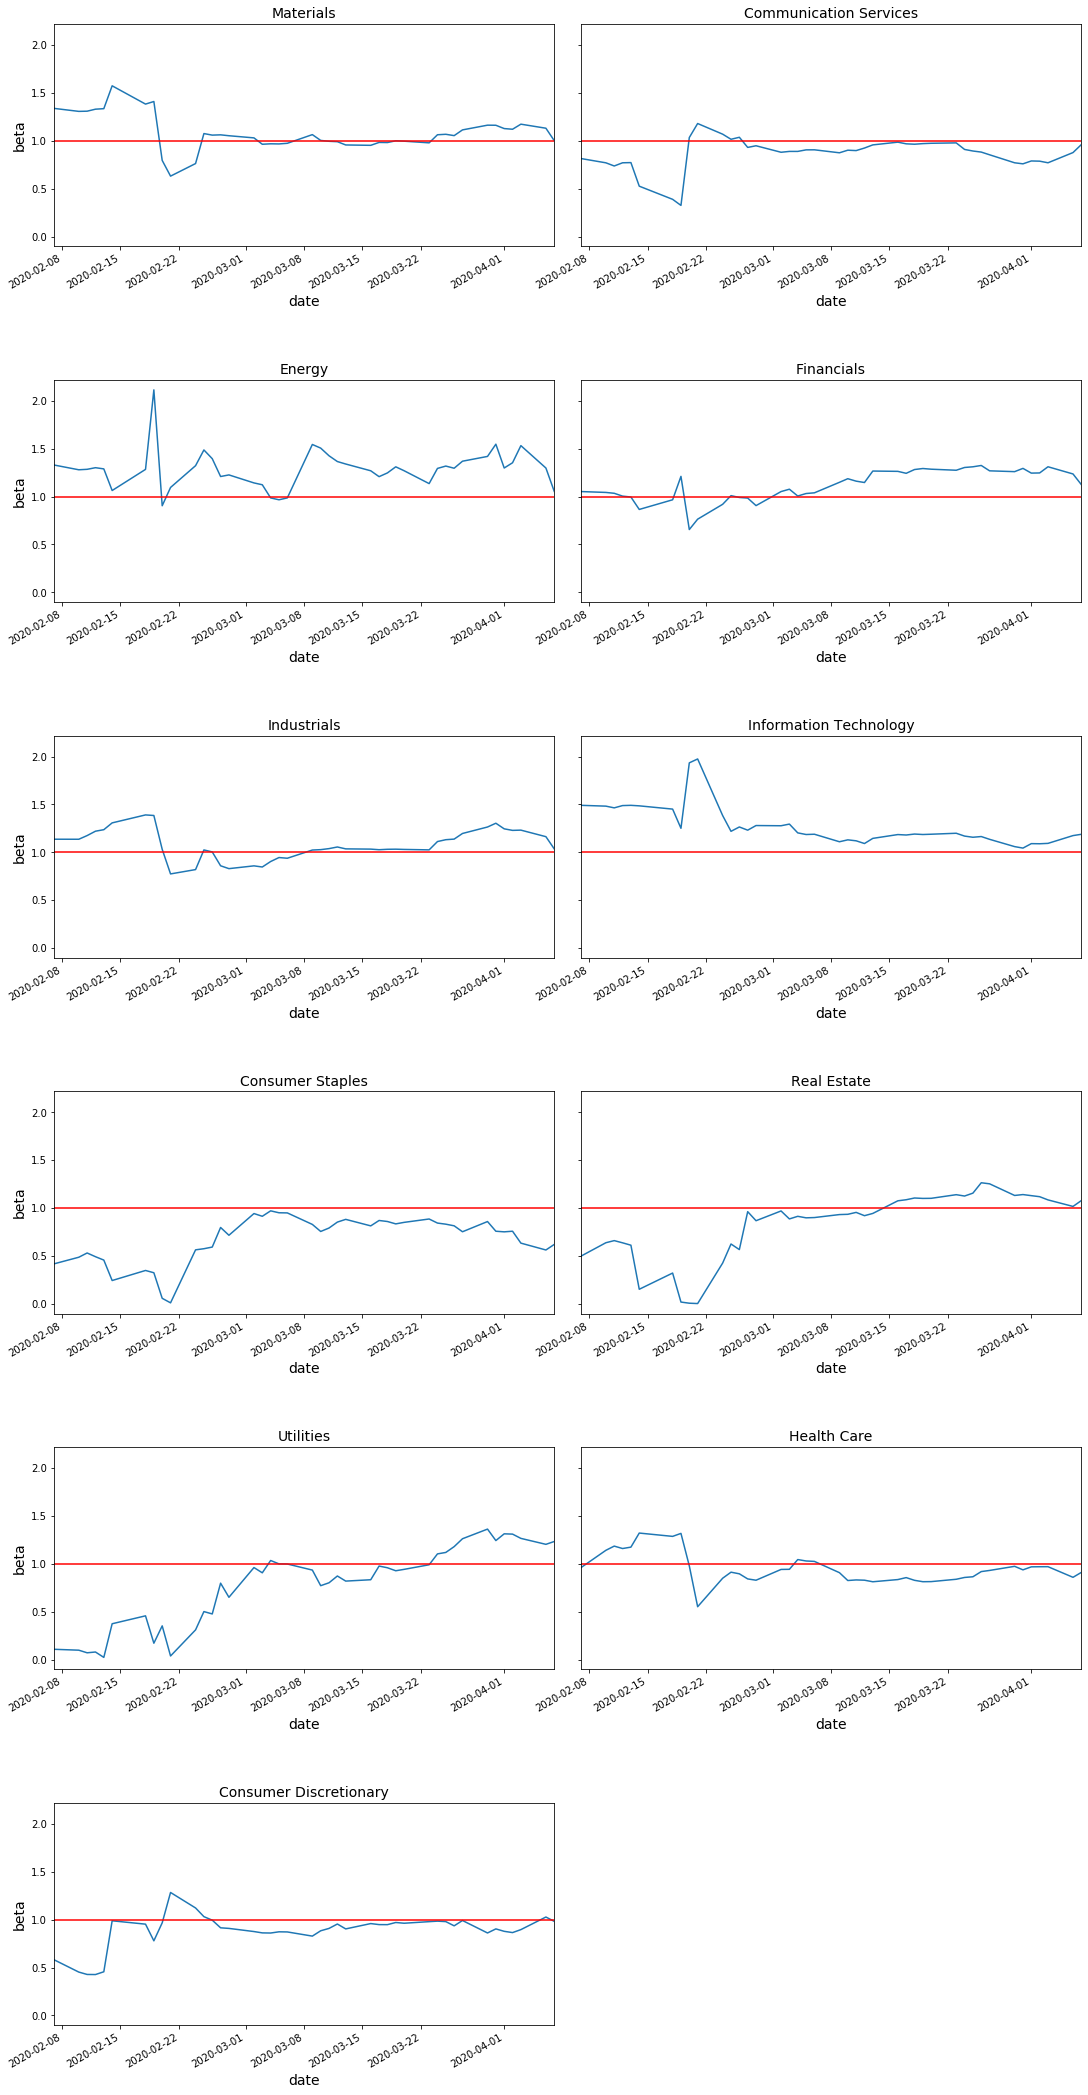

In [60]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2020-02-06', '2020-04-08'), 'one_month_betas.png')

In [65]:
three_months = t_test_for_symbol_betas(betas, '2019-12-06')
three_months.to_clipboard()
three_months

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,8.101359e-01,False,1.049375,1.060137,-0.010762
1,XLC,Communication Services,6.740666e-02,False,0.893438,0.960454,-0.067016
2,XLE,Energy,3.316468e-03,True,1.336598,1.149153,0.187445
3,XLF,Financials,3.374506e-04,True,1.249197,1.125255,0.123941
4,XLI,Industrials,1.030957e-01,False,1.110168,1.057148,0.053020
5,XLK,Information Technology,9.554855e-17,True,1.141133,1.403319,-0.262186
6,XLP,Consumer Staples,2.836761e-15,True,0.792140,0.435114,0.357026
7,XLRE,Real Estate,2.856992e-25,True,1.082285,0.462640,0.619645
8,XLU,Utilities,3.951225e-19,True,1.065522,0.326670,0.738853
9,XLV,Health Care,5.656541e-01,False,0.880450,0.857725,0.022726


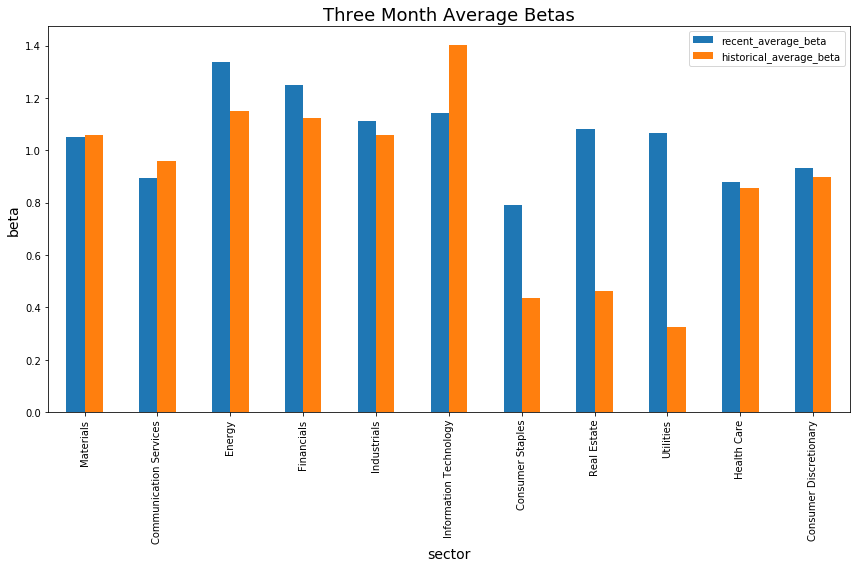

In [35]:
plot_average_betas(three_months, 'Three Month Average Betas')

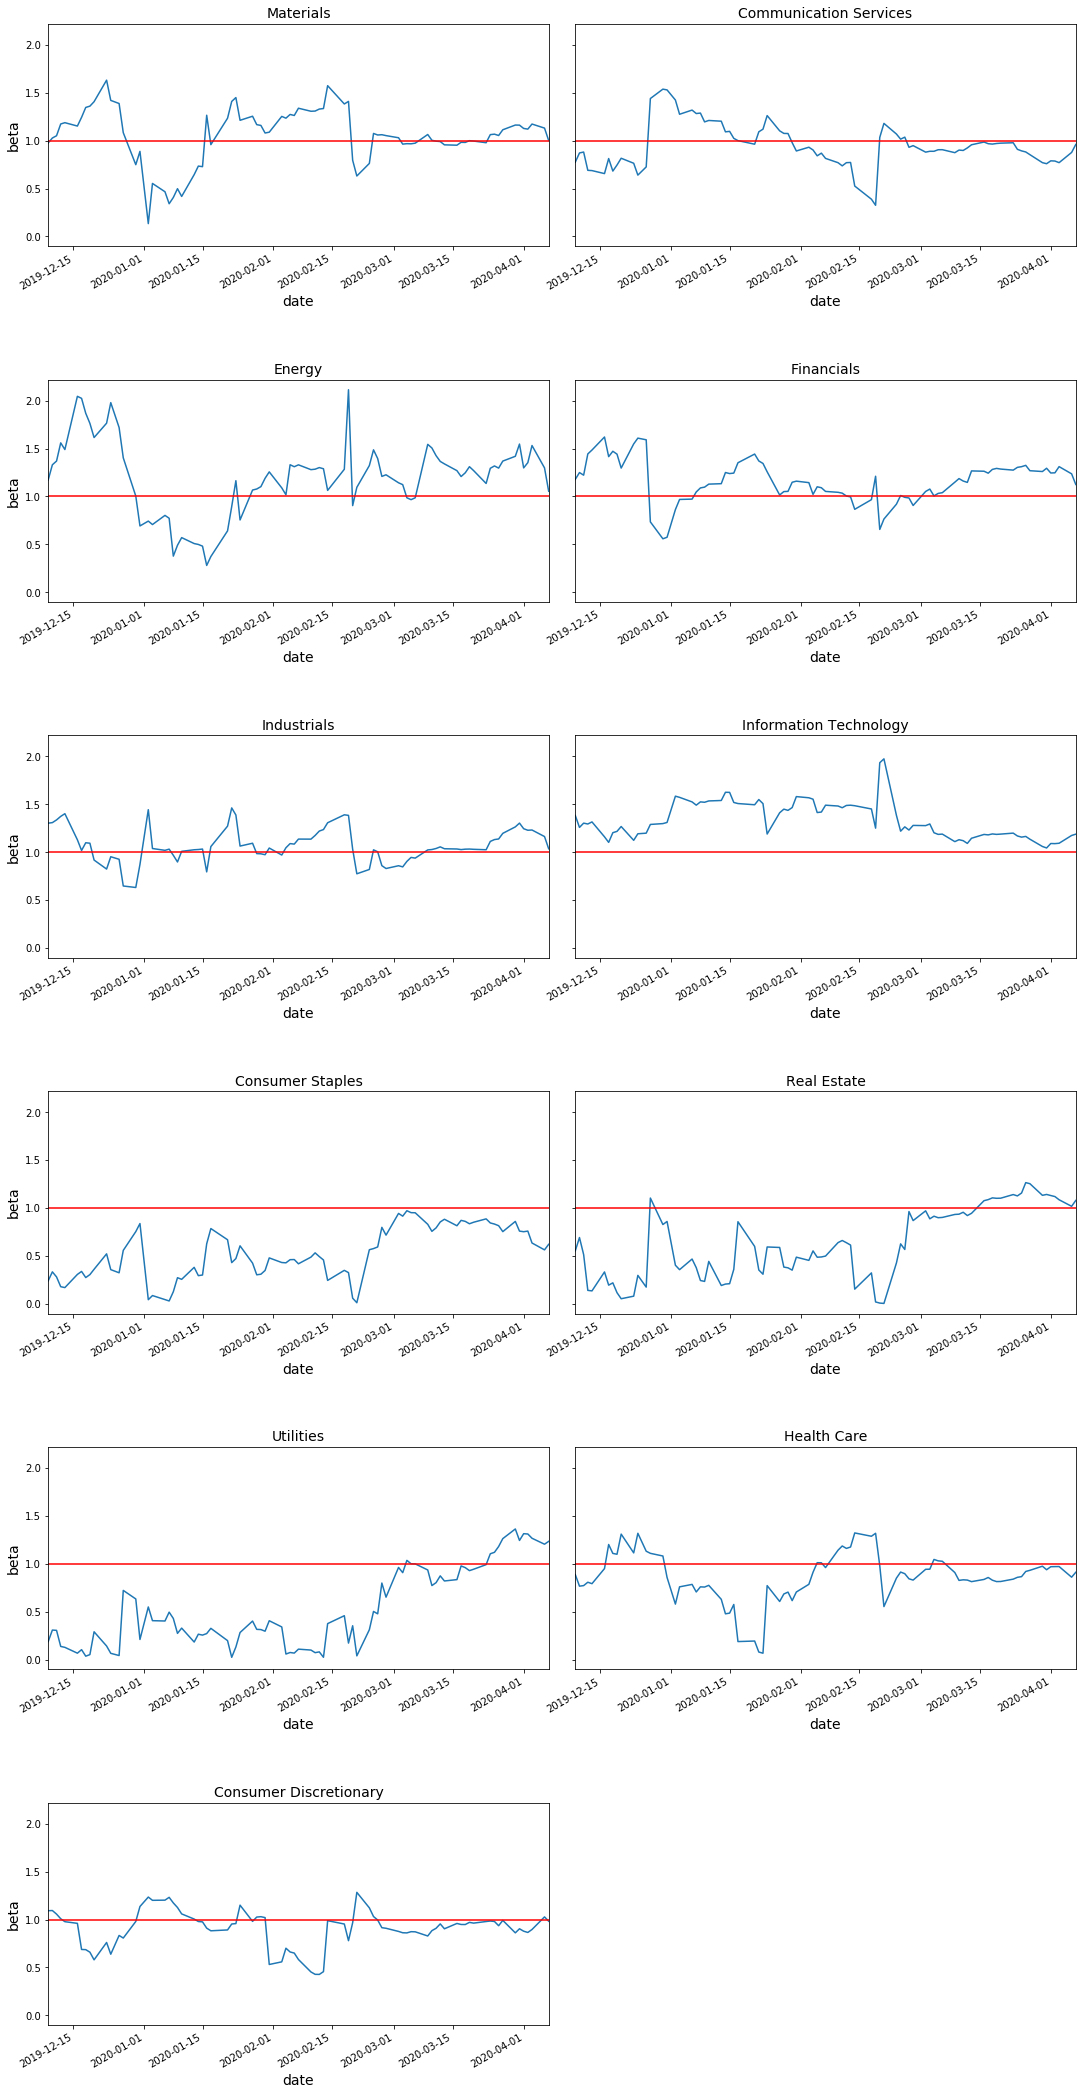

In [61]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-12-06', '2020-04-08'), 'three_month_betas.png')

In [66]:
one_year = t_test_for_symbol_betas(betas, '2019-03-06')
one_year.to_clipboard()
one_year

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,8.002802e-01,False,1.049375,1.043043,0.006332
1,XLC,Communication Services,1.640884e-09,True,0.893438,1.054304,-0.160866
2,XLE,Energy,1.770692e-08,True,1.336598,1.071418,0.265180
3,XLF,Financials,3.211318e-12,True,1.249197,1.097799,0.151397
4,XLI,Industrials,5.974968e-01,False,1.110168,1.124898,-0.014730
5,XLK,Information Technology,1.842181e-20,True,1.141133,1.355792,-0.214658
6,XLP,Consumer Staples,2.582014e-19,True,0.792140,0.472702,0.319439
7,XLRE,Real Estate,8.345874e-33,True,1.082285,0.499060,0.583225
8,XLU,Utilities,8.783782e-16,True,1.065522,0.336788,0.728735
9,XLV,Health Care,4.310804e-01,False,0.880450,0.858282,0.022169


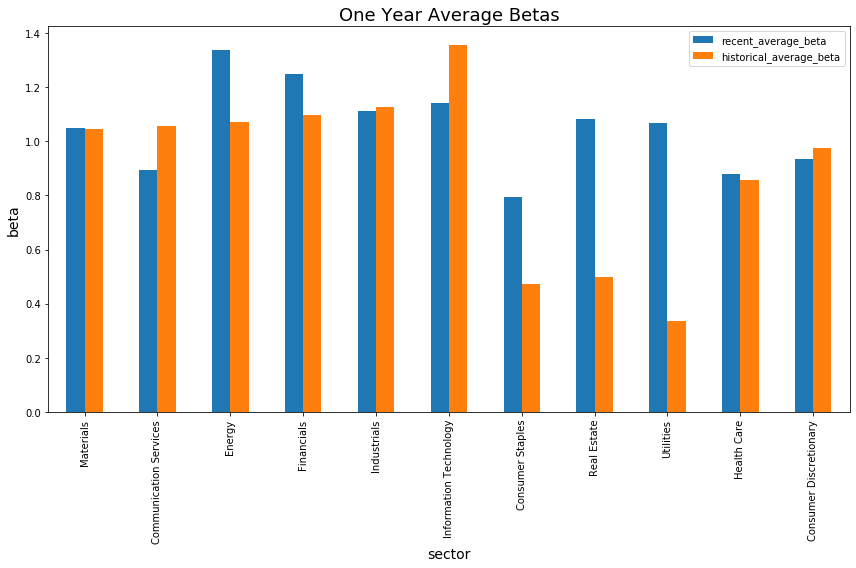

In [37]:
plot_average_betas(one_year, 'One Year Average Betas')

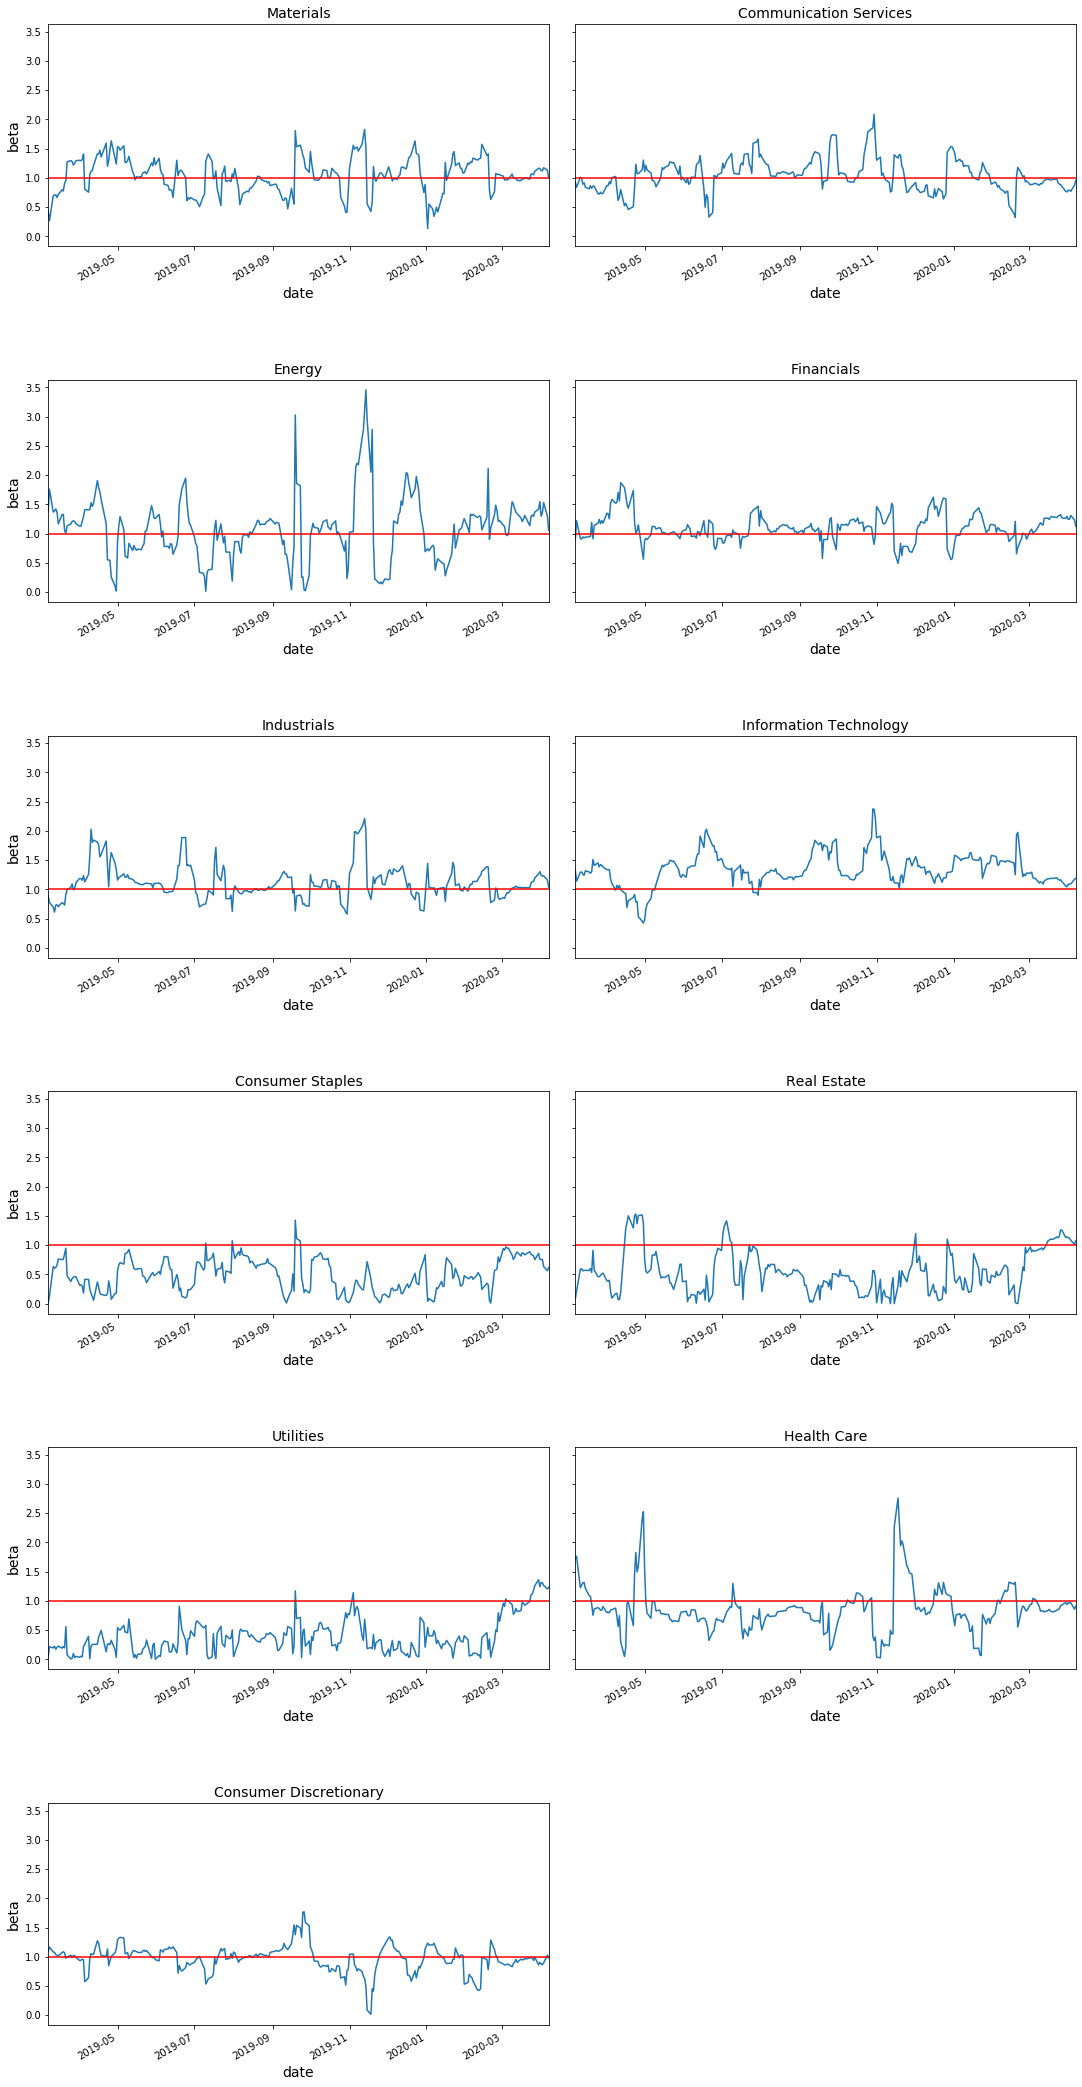

In [62]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-03-06', '2020-04-08'), 'one_year_betas.png')

In [67]:
five_year = t_test_for_symbol_betas(betas, '2015-03-06')
five_year.to_clipboard()
five_year

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,1.451097e-02,False,1.049375,1.097853,-0.048479
1,XLC,Communication Services,4.661371e-16,True,0.893438,1.126784,-0.233346
2,XLE,Energy,6.948749e-11,True,1.336598,1.053410,0.283188
3,XLF,Financials,3.628301e-20,True,1.249197,1.027422,0.221775
4,XLI,Industrials,2.564435e-01,False,1.110168,1.081577,0.028591
5,XLK,Information Technology,4.663482e-27,True,1.141133,1.374609,-0.233476
6,XLP,Consumer Staples,2.041388e-17,True,0.792140,0.488035,0.304105
7,XLRE,Real Estate,2.088272e-29,True,1.082285,0.475356,0.606929
8,XLU,Utilities,2.312355e-15,True,1.065522,0.328203,0.737320
9,XLV,Health Care,8.069210e-01,False,0.880450,0.875095,0.005355


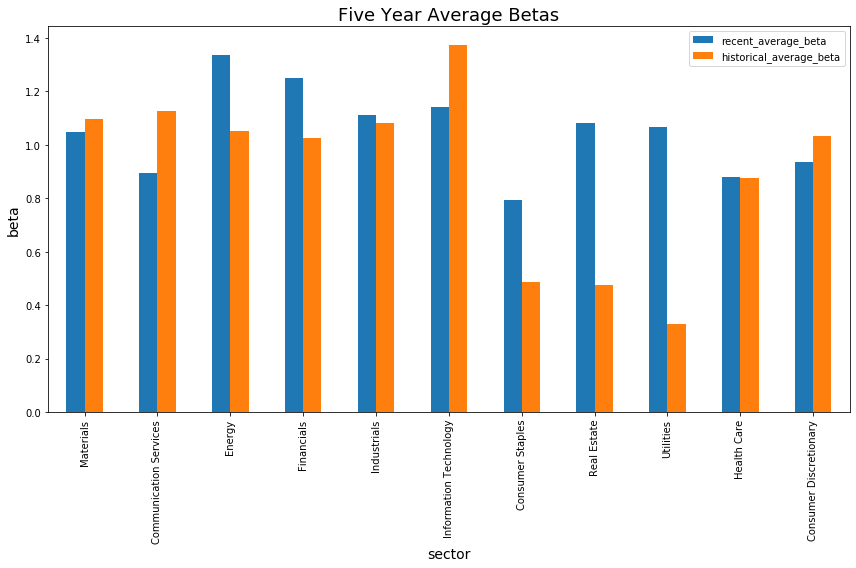

In [38]:
plot_average_betas(five_year, 'Five Year Average Betas')

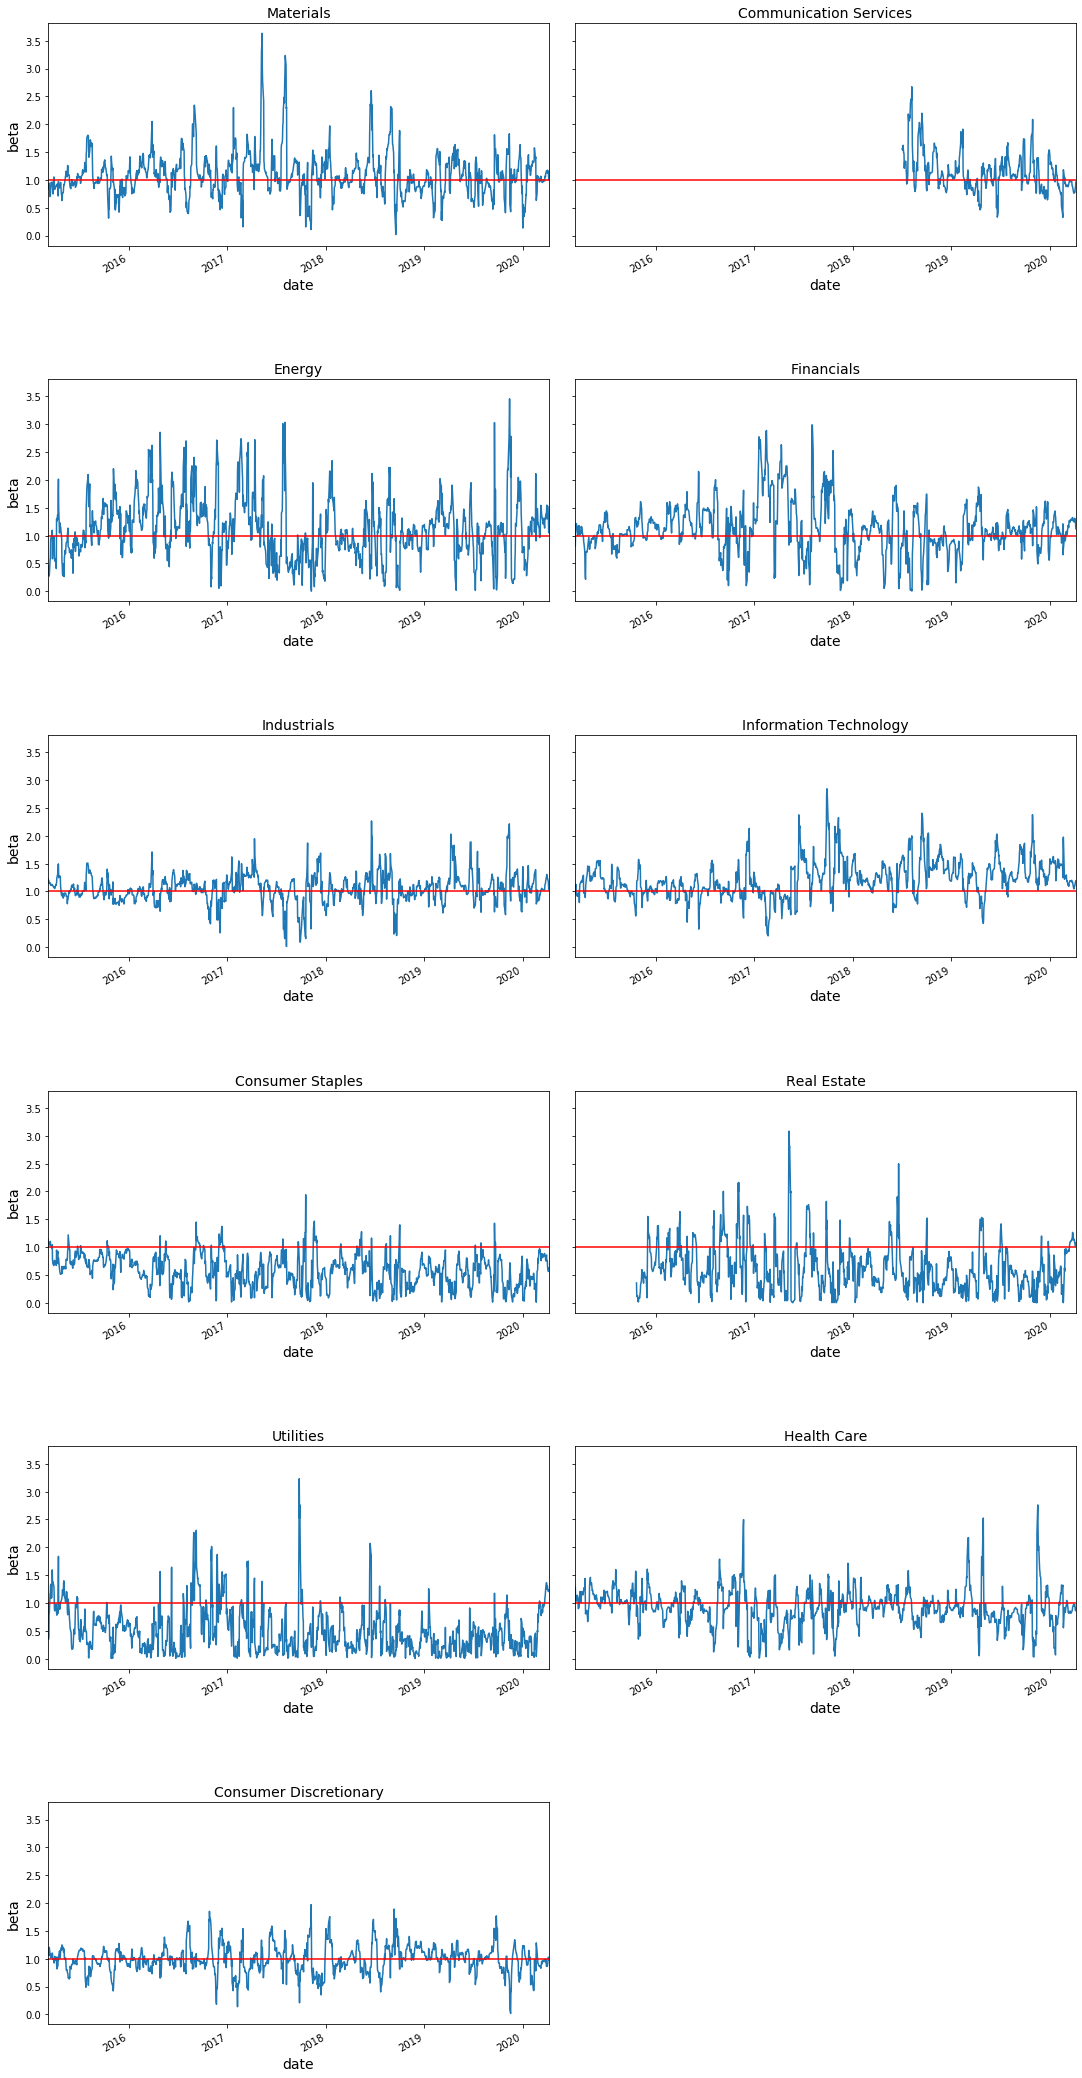

In [63]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2015-03-06', '2020-04-08'), 'five_year_betas.png')

In [84]:
    def correlation_between_stocks_and_index(df):
      data = {'symbol': [], 'sector': [], 'recent_corr': [], 'one_month_corr': [], 'three_month_corr': [], 'one_year_corr': [], 'five_year_corr': []}
      for sym in symbols:
        data['symbol'].append(sym)
        data['sector'].append(SECTOR_ETF_SYMBOLS[sym])
        col = f'{sym.lower()}_close'

        recent = get_data_for_a_period(df, '2020-02-21', '2020-04-08')
        one_month = get_data_for_a_period(df, '2020-01-21', '2020-02-21')
        three_month = get_data_for_a_period(df, '2019-10-21', '2020-01-21')
        one_year = get_data_for_a_period(df, '2019-02-21', '2020-02-21')
        five_year = get_data_for_a_period(df, '2015-02-21', '2020-02-21')

        data['recent_corr'].append(recent['spy_close'].corr(recent[col]))
        data['one_month_corr'].append(one_month['spy_close'].corr(one_month[col]))
        data['three_month_corr'].append(three_month['spy_close'].corr(three_month[col]))
        data['one_year_corr'].append(one_year['spy_close'].corr(one_year[col]))
        data['five_year_corr'].append(five_year['spy_close'].corr(five_year[col]))

      return pd.DataFrame(data)

In [85]:
corr_table = correlation_between_stocks_and_index(spy_df)
corr_table.to_clipboard()
corr_table

,symbol,sector,recent_corr,one_month_corr,three_month_corr,one_year_corr,five_year_corr
0,XLB,Materials,0.995695,0.897631,0.783390,0.902527,0.930511
1,XLC,Communication Services,0.993903,0.910120,0.985783,0.982764,0.937925
2,XLE,Energy,0.973158,0.097602,0.771859,-0.374304,0.215693
3,XLF,Financials,0.985140,0.953605,0.943732,0.970638,0.939522
4,XLI,Industrials,0.994266,0.924612,0.878791,0.962165,0.982177
5,XLK,Information Technology,0.985922,0.960493,0.994200,0.992807,0.994835
6,XLP,Consumer Staples,0.935120,0.926656,0.913278,0.912989,0.899677
7,XLRE,Real Estate,0.976133,0.810761,0.121715,0.780913,0.878332
8,XLU,Utilities,0.965998,0.568484,0.671670,0.884479,0.926799
9,XLV,Health Care,0.956717,0.855343,0.965002,0.932942,0.971502


In [102]:
    def plot_correlation(df, title):
      fig, ax = plt.subplots(figsize=(12, 8))
      ax.set_title(title, fontsize=18)
      ax.set_ylabel('correlation', fontsize=16)
      ax.set_xlabel('time period', fontsize=16)
      plt.xticks(fontsize=12)
      df[['sector', 'recent_corr', 'one_month_corr', 'three_month_corr', 'one_year_corr', 'five_year_corr']].plot(
          kind='box', x='sector', ax=ax)

      plt.tight_layout()
      plt.savefig(title)


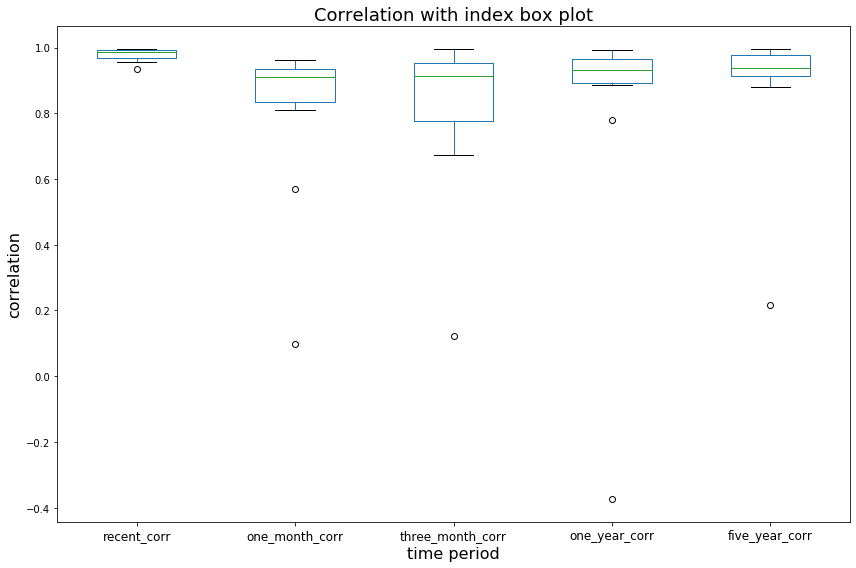

In [103]:
plot_correlation(corr_table, 'Correlation with index box plot')

In [143]:
   def plot_correlation_matrix(df, title):
      fig, ax = plt.subplots(figsize=(10, 8))
      df[IMPT_COLUMNS.keys()]
      corrMatrix = df.corr()
      sns.heatmap(corrMatrix, annot=True, ax=ax, vmin=-1, vmax=1, linewidths=1,
                       xticklabels=IMPT_COLUMNS.values(), yticklabels=IMPT_COLUMNS.values())
      b, t = plt.ylim()
      b += 0.5 
      t -= 0.5
      plt.ylim(b, t)
      ax.set_title(title, fontsize=16)
      plt.tight_layout()
      plt.savefig(title)
      plt.show()


In [147]:
        recent = get_data_for_a_period(spy_df, '2020-02-21', '2020-04-08')
        one_month = get_data_for_a_period(spy_df, '2020-01-21', '2020-02-21')
        three_month = get_data_for_a_period(spy_df, '2019-10-21', '2020-01-21')
        one_year = get_data_for_a_period(spy_df, '2019-02-21', '2020-02-21')
        five_year = get_data_for_a_period(spy_df, '2015-02-21', '2020-02-21')

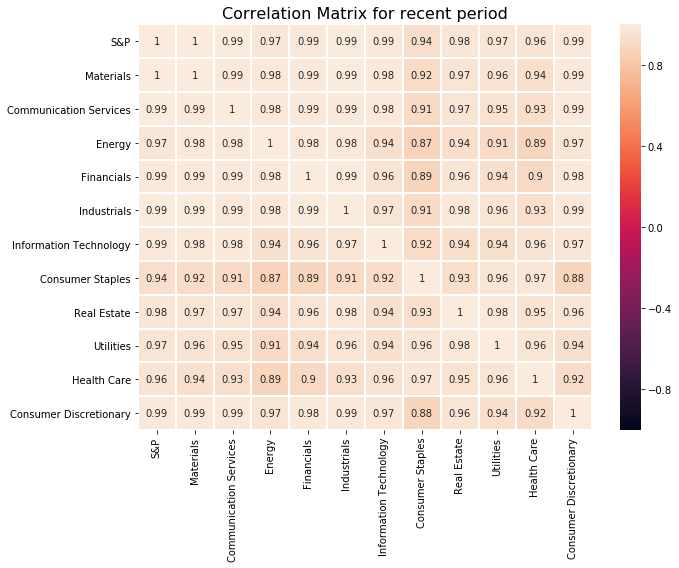

In [158]:
plot_correlation_matrix(recent, 'Correlation Matrix for recent period')

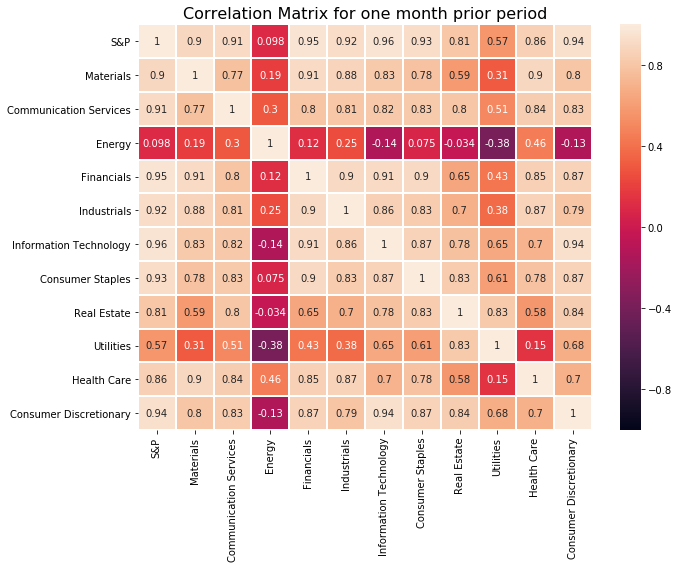

In [157]:
plot_correlation_matrix(one_month, 'Correlation Matrix for one month prior period')

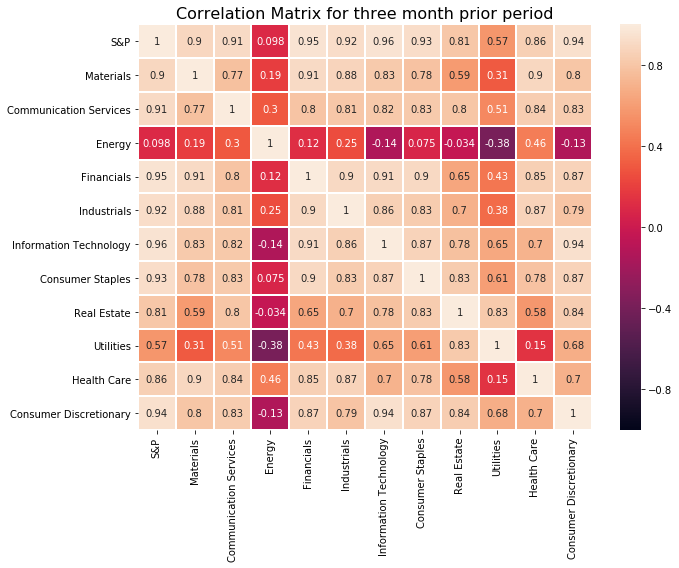

In [156]:
plot_correlation_matrix(one_month, 'Correlation Matrix for three month prior period')

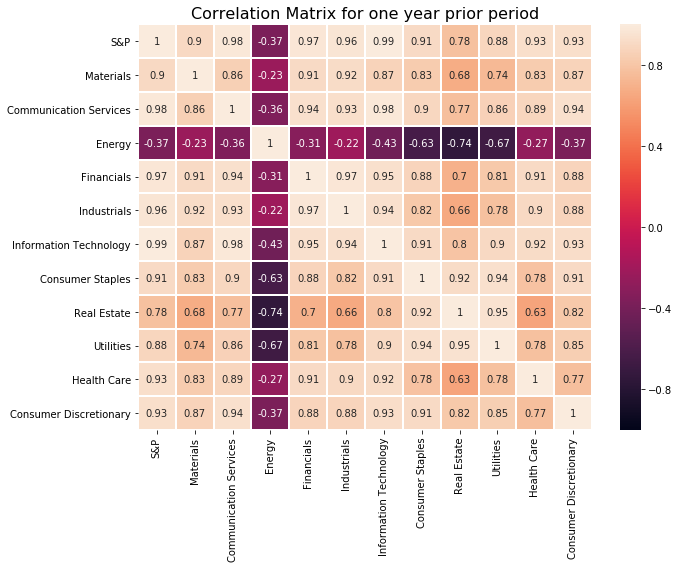

In [155]:
plot_correlation_matrix(one_year, 'Correlation Matrix for one year prior period')

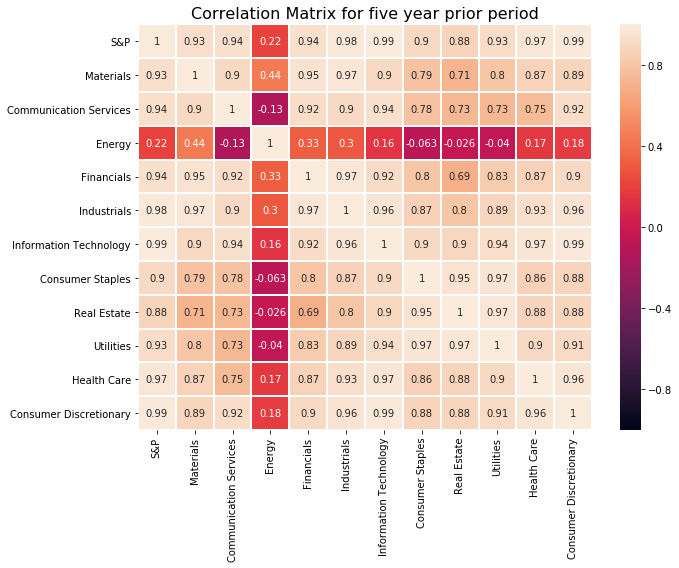

In [154]:
plot_correlation_matrix(five_year, 'Correlation Matrix for five year prior period')